In [155]:
from numpy.random import seed
seed(888)
import os
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
tf.random.set_seed(404)
import os
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
from time import strftime
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
label_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
img_width = 32
img_height = 32
img_pixels = img_width * img_height
color_channels = 3
validation_size = 10000
log_dir = 'tensorboard_cifar_logs/'

# Getting the data

In [3]:
(x_train_all,y_train_all), (x_test,y_test) = cifar10.load_data()

In [4]:
print(type (cifar10))
print(type (x_train_all))

<class 'module'>
<class 'numpy.ndarray'>


# Explore the Data

In [5]:
# x_train_all[0]

In [6]:
pic = tf.keras.utils.img_to_array(x_train_all[7])

In [7]:
label_names[y_train_all[6][0]]

'Bird'

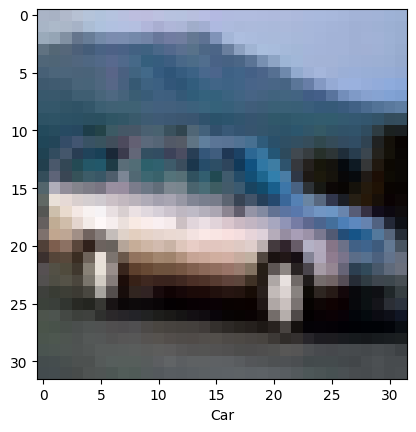

In [8]:
plt.imshow(x_train_all[4])
plt.xlabel(label_names[y_train_all[4][0]])
plt.show()

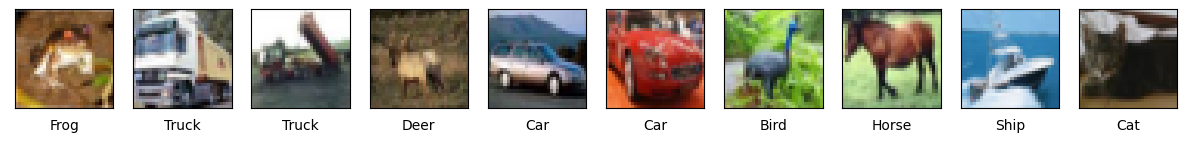

In [9]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(label_names[y_train_all[i][0]])
    plt.imshow(x_train_all[i])
plt.show()

In [10]:
no_images, x, y, c = x_train_all.shape
print("no of images {}, width {}, height {}, channels {}".format(no_images, x, y, c ))
# 3 channels mean - 3 color values

no of images 50000, width 32, height 32, channels 3


# Preprocess Data

In [11]:
type(x_train_all[0][0][0][0])
# it shows unsigned 8 bit integer
# if it was ' -10 ' then it would not be unsigned

numpy.uint8

In [12]:
x_train_all, x_test = x_train_all / 255.0, x_test/255.0

In [13]:
print(x_train_all[0][0][0][0])
print(len(x_train_all))
print(x_test[0][0][0][0])

0.23137254901960785
50000
0.6196078431372549


In [14]:
x_train_all = x_train_all.reshape(x_train_all.shape[0],img_pixels*color_channels)

In [15]:
x_train_all.shape

(50000, 3072)

In [16]:
x_test = x_test.reshape(x_test.shape[0], img_pixels*color_channels)

In [17]:
x_test.shape

(10000, 3072)

# Creating Validation Dataset

In [18]:
x_val = x_train_all[:validation_size]
y_val = y_train_all[:validation_size]
x_val.shape

(10000, 3072)

In [19]:
#x_train and y_train will have the *LAST* 40000 values from both x_train_alll and y_train_all
x_train = x_train_all[validation_size:]
y_train = y_train_all[validation_size:]
x_train.shape

(40000, 3072)

## Creating a sample illustration dataset

In [20]:
x_train_ill = x_train[:1000]
y_train_ill = y_train[:1000]

# The Neural Networks with keras

In [21]:
model_1 = Sequential([
    Dense(units = 128, input_dim=img_pixels*color_channels, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10,activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
type(model_1)

keras.engine.sequential.Sequential

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape= (img_pixels*color_channels,)))
model_2.add(Dense(128, activation='relu', name='m2_hidde1'))
model_2.add(Dense(64, activation='relu', name='m2_hidde2'))
model_2.add(Dense(16, activation='relu', name='m2_hidde3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape= (img_pixels*color_channels,)))
model_3.add(Dense(128, activation='relu', name='m3_hidde1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m2_hidde2'))
model_3.add(Dense(16, activation='relu', name='m2_hidde3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tensorboard (visual learning)

In [26]:
def get_tensorboard(model_name):
    folder_name = f'model_name at {strftime("%H %M")}'
    dir_paths = os.path.join(log_dir,folder_name)
    try: 
        os.makedirs(dir_paths)
        print(folder_name)
    except OSError as err:
        print(err.strerror)
    else:
        print('success')
    return TensorBoard(log_dir=dir_paths)

# Fitting the Model

In [27]:
samples_per_batch = 1000

In [28]:
# %%time
# no_epochs = 100
# model_1.fit(x_train_all, y_train_all, batch_size=samples_per_batch, epochs=no_epochs, callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))
# #Verbose=0 hides the results, verbose= 1 in default..

In [29]:
 %%time
no_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=no_epochs, callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))
#Verbose=0 hides the results, verbose= 1 in default..

model_name at 00 14
success
CPU times: total: 8min 44s
Wall time: 3min 12s


In [30]:
 %%time
no_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=no_epochs, callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))
#Verbose=0 hides the results, verbose= 1 in default..

model_name at 00 17
success
CPU times: total: 19min 9s
Wall time: 6min 16s


In [31]:
%%time
no_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=no_epochs, callbacks=[get_tensorboard('Model 3')], verbose=0, validation_data=(x_val, y_val))
#Verbose=0 hides the results, verbose= 1 in default..

model_name at 00 23
success
CPU times: total: 19min 19s
Wall time: 6min 37s


# Prediction on Individual Images

In [78]:
x_val.shape

(10000, 3072)

In [79]:
x_val[0].shape

(3072,)

In [80]:
test = np.expand_dims(x_val[0],axis=0)
test.shape

(1, 3072)

In [94]:
np.set_printoptions(precision=3)

In [95]:
model_2.predict(test)

1/1 [==============================] - 0s 30ms/step


array([[1.962e-03, 1.408e-03, 8.059e-02, 1.303e-01, 9.939e-02, 1.197e-01,
        5.221e-01, 4.378e-02, 3.636e-04, 4.877e-04]], dtype=float32)

In [96]:
model_2.predict(x_val).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [97]:
np.argmax(model_2.predict(test), axis=-1)

1/1 [==============================] - 0s 35ms/step


array([6], dtype=int64)

In [99]:
y_val[0]

array([6], dtype=uint8)

In [119]:
for number in range(10):
    test_img = np.expand_dims(x_val[number],axis=0)
    predicted_val = np.argmax(model_2.predict(test_img), axis=-1)
    #predicted_val = model_2.predict_classes(test_image)[0]
    #predicted_classes no more
    print("Actual Value: {}  vs  Predicted: {}".format(y_val[number][0], predicted_val[0]))

1/1 [==============================] - 0s 60ms/step
Actual Value: 6  vs  Predicted: 6
1/1 [==============================] - 0s 28ms/step
Actual Value: 9  vs  Predicted: 1
1/1 [==============================] - 0s 34ms/step
Actual Value: 9  vs  Predicted: 9
1/1 [==============================] - 0s 45ms/step
Actual Value: 4  vs  Predicted: 6
1/1 [==============================] - 0s 37ms/step
Actual Value: 1  vs  Predicted: 1
1/1 [==============================] - 0s 36ms/step
Actual Value: 1  vs  Predicted: 7
1/1 [==============================] - 0s 30ms/step
Actual Value: 2  vs  Predicted: 2
1/1 [==============================] - 0s 28ms/step
Actual Value: 7  vs  Predicted: 7
1/1 [==============================] - 0s 29ms/step
Actual Value: 8  vs  Predicted: 8
1/1 [==============================] - 0s 32ms/step
Actual Value: 3  vs  Predicted: 9


# Evaluation

In [120]:
model_2.metrics_names

['loss', 'accuracy']

In [129]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print('Test loss is {} and the test accuracy is {}'.format(test_loss, test_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.4393 - accuracy: 0.4863
Test loss is 1.4392516613006592 and the test accuracy is 0.486299991607666


# Confusion Matrix

In [136]:
prediction = np.argmax(model_2.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_true = y_test, y_pred=prediction)


313/313 [==============================] - 1s 3ms/step


In [137]:
conf_matrix.shape

(10, 10)

In [141]:
no_rows = conf_matrix.shape[0]
no_columns = conf_matrix.shape[1]

In [142]:
conf_matrix.max()

640

In [143]:
conf_matrix.min()

6

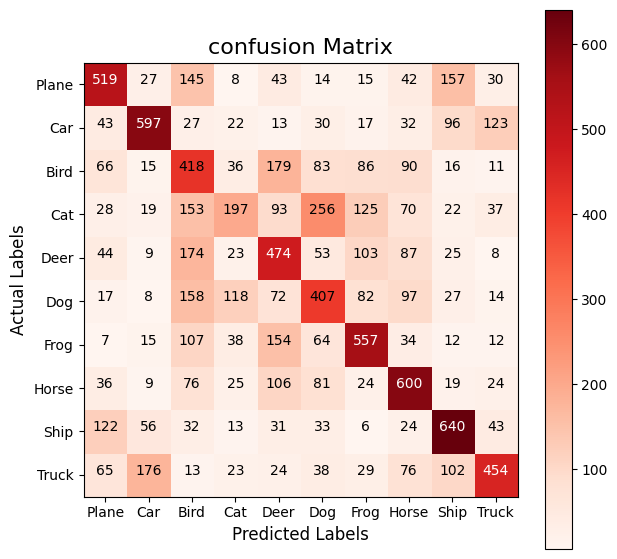

In [160]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)
plt.title('confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
tick_marks = np.arange(10)
plt.yticks(tick_marks, label_names)
plt.xticks(tick_marks, label_names)
plt.colorbar()
for i, j in itertools.product(range(no_rows), range(no_columns)):
    plt.text(j,i,conf_matrix[i,j], horizontalalignment='center', 
             color='white' if conf_matrix[i,j]>450 else 'black')
plt.show()

In [161]:
#True positives
np.diag(conf_matrix)

array([519, 597, 418, 197, 474, 407, 557, 600, 640, 454], dtype=int64)

In [170]:
#Calculating Recall
recall = np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)
print("recall - ", recall)
#Average recall of the model
avg_recall = np.mean(recall)
print("average recall of the model -", avg_recall)

recall -  [0.519 0.597 0.418 0.197 0.474 0.407 0.557 0.6   0.64  0.454]
average recall of the model - 0.48629999999999995


In [172]:
#Calculating Precision
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
print("Precision -", precision)
#Average Precision of the model
avg_precision = np.mean(precision)
print("Average Precision of the model -",avg_precision)

Precision - [0.548 0.641 0.321 0.392 0.399 0.384 0.534 0.521 0.573 0.601]
Average Precision of the model - 0.4913083898793135


In [174]:
#Calculating the F1 Score
f1_score = 2*(avg_precision*avg_recall)/(avg_precision + avg_recall)
print("F1 score of the model is -", f1_score)

F1 score of the model is - 0.48879136568745163
